In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
#Variables
t = 252 #Trading days
dt = 1/ t 
r = 0.05 #risk free rate as effective rate
r_c = np.log(1+r) #risk free rate as a compounded rate
variance = 0.02 
stock_0 = 100 #Initial price of the option
strike_p = 100 #The option is at the money

In [6]:
def simulate_stock_price (mean, variance, S0, t, dt): 
    Z = np.random.normal(0, 1, size=252) #Generate a random variable with N(0,1)
    
    stock_price = np.empty(t) #Empty array of size t
    stock_price[0] = S0 #Add the initial value of the stock to the array
    
    drift = (mean - (0.5 * variance)) * dt # define the drift 
    
    diffusion = np.sqrt(variance) * np.sqrt(dt) #define the diffusion
    
    
    for i in range (1,t):
        stock_price[i] = stock_price[i-1] * np.exp(drift + (diffusion * Z[i-1]) )
        
    return stock_price

def Monte_Carlo(n_paths, mean, variance, S0, t, dt):
    paths = np.empty((n_paths, t))
    for j in range (0,n_paths):
        paths[j,:] = simulate_stock_price(mean, variance, S0, t, dt)
    return paths

def Pricing (s_price, strike, r, t):
    ST = s_price[:, -1]
    payoff = np.maximum(ST- strike, 0.0)
    call_price = np.exp(-r) * np.mean(payoff)
    return call_price

In [7]:
# S = simulate_stock_price(r_c, variance, stock_0, t, dt)
MCS = Monte_Carlo(1000, r_c, variance, stock_0, t, dt)

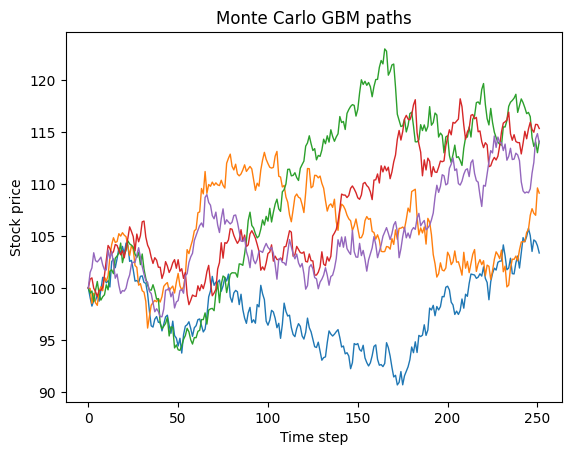

In [8]:
n_plot = 5
idx = np.random.choice(MCS.shape[0], n_plot, replace = "False")

for i in idx:
    plt.plot(MCS[i], lw=1)

plt.xlabel("Time step")
plt.ylabel("Stock price")
plt.title("Monte Carlo GBM paths")
plt.show()

In [9]:
call = Pricing(MCS,strike_p,r_c,t)
print(call)

7.958251173467017
